In [23]:
import numpy as np
import matplotlib.pyplot as plt

class perceptron:
    def __init__(self,n,beta,bias,name='default'):
        pesos      = beta*np.ones(n)
        pesos      = np.concatenate((pesos,np.array([bias])))
        self.n     = n
        self.name  = name
        self.pesos = pesos
    
    def Evaluar(self,entradas):
        ##########################################################################
        #   La función de activación del perceptron será la función "Sigmoide"   #
        #                      sigmoide = 1 / ( 1 + e^{-S} )                     #
        ##########################################################################
        S     = self.pesos.dot(entradas)
        sigma = 1 / ( 1 + np.exp(-S) )
        return sigma

class NeuralNet:
    def __init__(self,layersShape,initialize,bias,InSize,InAll,name='Perc'):
        size  = len(layersShape)
        Net   = np.resize( np.array( [] , dtype = perceptron), size)
        count = 0
        nIn   = InSize
        for i,nPerc in enumerate(layersShape):
            layer  = []
            ini  = np.random.rand(nPerc) if initialize == 'random' else [initialize]*nPerc
            Bias = np.random.rand(nPerc) if bias == 'random' else [bias]*nPerc
            for j in range(nPerc):
                layer += [perceptron(nIn,ini[j],Bias[j],f'{name}_layer{i}_perc{count}')]
                count += 1
            Net[i] = layer
            nIn    = nPerc + InSize if InAll else nPerc
        self.layers      = Net
        self.layersShape = layersShape
        self.nlayers     = size
        self.nNodes      = count
        self.InAll       = InAll
        self.name        = name
        self.InSize      = InSize
    
    def Evaluar(self,In):
        shape = self.layersShape
        size  = self.nlayers
        Net   = self.layers
        InAll = self.InAll
        IN    = [In]
        OUT   = []
        for i,nPerc in enumerate(shape):
            Outi  = []
            IN[i] = IN[i] + [1]  # Se agrega "1" al vector de entrada, que representa la entrada para el "bias"
            for j in range(nPerc):
                Outi += [Net[i][j].Evaluar(IN[i])]
            IN   += [In + Outi] if InAll else [Outi]
            OUT  += [Outi]
        self.layersOut = OUT
        self.layersIn  = IN
        return OUT[-1]
    
    def Train(self,epocas,lr,DataSet):
        print('\n\n'+'\033[1m' + f'Entrenamiento de la red {self.name}' + '\033[0m' + '\n')
        MSE  = []
        Conv = False
        for i in range(epocas):
            error = 0
            MSEi  = 0
            conv  = []
            for j,[In,Out] in enumerate(DataSet):
                yd    = np.array(Out)
                y     = np.array(self.Evaluar(In))
                error = np.linalg.norm(yd - y)
                conv += [True] if error <= 0.1 else [False]
                MSEi += 0.5*error**2
                self.Backpropagation(lr,yd,In)
            # Verificar si cumple el criterio de convergencia de error <= 0.1
            if not Conv:
                Conv = True
                for co in conv:
                    Conv = Conv and co
                if Conv:
                    print(f'Convergencia en \033[1mepoca {i}\033[0m')
            MSE  += [MSEi/j]
        if not Conv:
            print(f'No convergencia en {epocas} epocas')
        return MSE
    
    def Backpropagation(self,lr,yd,entradas):
        shape   = self.layersShape
        nlayers = self.nlayers
        Net     = self.layers
        InAll   = self.InAll
        Out     = self.layersOut
        In      = self.layersIn
        
        #########################################
        # Obtener los valores "delta" de la red #
        #########################################
        
        delta  = [ [ ] ]*nlayers
        error  = np.array(yd) - np.array(Out[-1])
        error  = [*error]
        for i,nPerc in reversed(list(enumerate(shape))): # Iterar sobre las capas de la red
            deltai = []
            errori = []
            for j in range(nPerc): # Iterar sobre las "neuronas" de la capa i
                deltaij  = [error[j]*Out[i][j]*(1-Out[i][j])]*Net[i][j].pesos.size
                deltai  += [deltaij]
            delta[i] = deltai
            for k in range(Net[i][0].pesos.size-1): # Iterar sobre cada uno de los pesos de la neurona ij
                errorij = 0
                for j in range(nPerc): # Iterar sobre las "neuronas" de la capa i
                    errorij += delta[i][j][k]*Net[i][j].pesos[k]
                errori += [errorij]
            error  = errori
        
        ##############################################
        #       Actualizar los pesos de la red       #
        ##############################################
        for i,nPerc in enumerate(shape):
            for j in range(nPerc):
                for k in range(Net[i][j].pesos.size):
                    Net[i][j].pesos[k] += lr*delta[i][j][k]*In[i][k]
        self.layers = Net

**************************************************************************************************
Evaluación de las redes neuronales para la compuerta logica "And", "Or" y "Xor" sin entrenamiento
**************************************************************************************************
         And                   Or               Xor
1: [0, 0] ... 0.6   |   [0, 0] ... 0.8   |   [0, 0] ... 0.8
2: [0, 1] ... 0.6   |   [0, 1] ... 0.8   |   [0, 1] ... 0.8
3: [1, 0] ... 0.6   |   [1, 0] ... 0.8   |   [1, 0] ... 0.8
4: [1, 1] ... 0.7   |   [1, 1] ... 0.8   |   [1, 1] ... 0.8

***********************************
Entrenamiento de las redes
***********************************
Tasa de aprendizaje: 0.8
Peso inicial: random
Bias: random
Epocas de entrenamiento: 10000


Entrenamiento de la red And

Convergencia en epoca 409


Entrenamiento de la red Or

Convergencia en epoca 411


Entrenamiento de la red Xor

Convergencia en epoca 1941

**************************************************

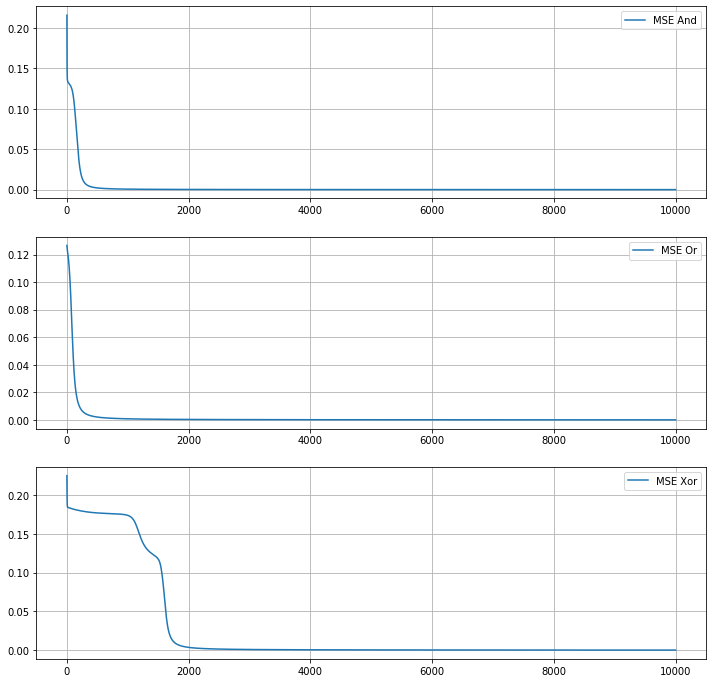

In [27]:
lr     = 0.8
epocas = 10000
wi     = 'random'
bias   = 'random'
conAll = False
shape  = (2,1) # Forma de la red (capas y neuronas por cada capa)

####################################################################
###    Generar los dataset para el entrenamiento de las redes    ###
####################################################################

Dataset_And = [[[0, 0], [0]],
               [[0, 1], [0]],
               [[1, 0], [0]],
               [[1, 1], [1]]]
Dataset_Or  = [[[0, 0], [0]],
               [[0, 1], [1]],
               [[1, 0], [1]],
               [[1, 1], [1]]]
Dataset_Xor = [[[0, 0], [0]],
               [[1, 1], [0]],
               [[0, 1], [1]],
               [[1, 0], [1]]]

#####################################################################
###                  Crear las redes neuronales                   ###
#####################################################################

And = NeuralNet(shape,wi,bias,2,conAll,'And')
Or  = NeuralNet(shape,wi,bias,2,conAll,'Or')
Xor = NeuralNet(shape,wi,bias,2,conAll,'Xor')

print('**************************************************************************************************')
print(f'Evaluación de las redes neuronales para la compuerta logica "And", "Or" y "Xor" sin entrenamiento')
print('**************************************************************************************************')
print('\033[1m' + f'         And                   Or               Xor' + '\033[0m')
for i,[In,Out] in enumerate(Dataset_And):
    a  = And.Evaluar(In)
    b  = Or.Evaluar(In)
    c  = Xor.Evaluar(In)
    print(f'{i+1}: {In} ... {a[0]:.1f}   |   {In} ... {b[0]:.1f}   |   {In} ... {c[0]:.1f}')

print(f'\n***********************************\n\033[1mEntrenamiento de las redes\033[0m\n***********************************')
print(f'Tasa de aprendizaje: {lr}\nPeso inicial: {wi}\nBias: {bias}\nEpocas de entrenamiento: {epocas}')

###############################################################
#  Backpropagation para generar la compuerta lógica And y Or  #
###############################################################

MSE_And = And.Train(epocas,lr,Dataset_And)
MSE_Or  = Or.Train(epocas,lr,Dataset_Or)
MSE_Xor = Xor.Train(epocas,lr,Dataset_Xor)

print('\n********************************************************************************************************')
print(f'Evaluación de las redes para la compuerta logica "And", "Or" y "Xor" con entrenamiento de {epocas} epocas')
print('********************************************************************************************************')
print('\033[1m' + f'         And                   Or               Xor' + '\033[0m')
for i,[In,Out] in enumerate(Dataset_And):
    a  = And.Evaluar(In)
    b  = Or.Evaluar(In)
    c  = Xor.Evaluar(In)
    print(f'{i+1}: {In} ... {a[0]:.1f}   |   {In} ... {b[0]:.1f}   |   {In} ... {c[0]:.1f}')

plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.plot(MSE_And)
plt.legend(['MSE And'])
plt.grid()
plt.subplot(3,1,2)
plt.plot(MSE_Or)
plt.legend(['MSE Or'])
plt.grid()
plt.subplot(3,1,3)
plt.plot(MSE_Xor)
plt.legend(['MSE Xor'])
plt.grid()
plt.show()

# Conclusiones
Se observa del desarrollo del perceptrón que, este es capaz de aprender los patrones existentes en los conjuntos de entrenamiento siempre y cuando estas diferencias sean "_visibles_", tal como es el caso del perceptrón para la compuerta lógica **Xor**, en donde las diferencias en sus conjunto de entrenamiento no son muy evidentes, ya que la activación se da con las combinaciones [1,0] y [0,1], las cuales son muy parecidas entre si. Para el caso de la compuerta **Xor** se requiere del uso de una red de perceptrones (Mejor conocida como red neuronal) de manera que toda la red en conjunto aprenda las caracterísitcas [0,1] y [1,0].  
- Se puede entonces concluir que el perceptrón es una unidad de percepción minima que comopne a una red neuronal y que tiene la capacidad de identificar patrones dentro de un conjunto de datos, pero la limitante de que estos patrones deben tener razgos que sean relativamente faciles de diferenciar entre si, de otro modo el perceptrón por si solo no será capaz de aprender dichos patrones.
- También se observó que los parámetros utilizados para crear el perceptrón tienen influencia en la convergencia a la hora del entrenamiento del perceptrón, ya que una solución inicial que se aproxime en mejor medida a los parámetros "*ideales*" del perceptrón permitira una convergencia más rápida a la solución adecuada, por otro lado, una solución inicial que se encuentre muy alejada de los parámetros "*ideales*" hara que el entrenamiento del perceptrón le tome mayor cantidad de epocas alcanzar una convergencia.
- Al igual que la solución inicial es importante, también lo es el factor de aprendizaje o tasa de aprendizaje, ya que este permite acelerar o desacelerar la actualización de los valores hacia el valor adecuado de los pesos, pero también es importante que un valor de tasa de aprendizaje pequeño, provoca que tarde más una convergencia hacia los valores adecuados, mientras que un valor muy alto puede provocar una desestabilización o hacer que no se converga a un valor adecuado de los pesos del perceptrón.
- Finalmente, la selección del bias también es importante, ya que este permite al perceptrón una mejor discerción de la información de entrada, por lo que su valor resulta importante.